<a href="https://colab.research.google.com/github/miguelgargallo/jupyter-notebook/blob/main/04-tensorflow-pirates-chatbot" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
#importing the libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import json
import nltk
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, GlobalMaxPooling1D, Flatten
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

In [18]:
#importing the dataset
with open('content.json') as content:
  data1 = json.load(content)

In [20]:
#getting all the data to lists
tags = []
inputs = []
responses={}
for intent in data1['intents']:
  responses[intent['tag']]=intent['responses']
  for lines in intent['input']:
    inputs.append(lines)
    tags.append(intent['tag'])

In [22]:
#converting to dataframe
data = pd.DataFrame({"inputs":inputs,
                     "tags":tags})

In [24]:
#printing the data
data

inputs           tags
0                                          hello       greeting
1                                       hi there       greeting
2                               nice to meet you       greeting
3       hi, is this is the pirate's organization       greeting
4                             any pirates here ?       greeting
..                                           ...            ...
76         tell me more about the pre requisites  prerequisites
77    give more details about the pre-requisites  prerequisites
78                     What are the requirements  prerequisites
79                 what's the basic requirements  prerequisites
80  what are the basic skills to get recruited ?  prerequisites

[81 rows x 2 columns]

In [25]:
data = data.sample(frac=1)

In [27]:
#removing punctuations
import string
data['inputs'] = data['inputs'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data['inputs'] = data['inputs'].apply(lambda wrd: ''.join(wrd))
data

inputs         tags
62  how to join the straw hat pirates          join
4                    any pirates here      greeting
38                        who are you     whoareyou
61       how do i join the straw hats          join
39                       what are you     whoareyou
..                                 ...          ...
15                              thanks      goodbye
50                      where are you   whereareyou
14                           thank you      goodbye
19                               adios      goodbye
47                 where are you from   whereareyou

[81 rows x 2 columns]

In [28]:
#tokenize the data
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(data['inputs'])
train = tokenizer.texts_to_sequences(data['inputs'])
#apply padding
from tensorflow.keras.preprocessing.sequence import pad_sequences
x_train = pad_sequences(train)

#encoding the outputs
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(data['tags'])

In [29]:
input_shape = x_train.shape[1]
print(input_shape)

8


In [30]:
#define vocabulary
vocabulary = len(tokenizer.word_index)
print("number of unique words : ",vocabulary)
output_length = le.classes_.shape[0]
print("output length: ",output_length)

number of unique words :  96
output length:  8


In [31]:
#creating the model

i = Input(shape=(input_shape,))
x = Embedding(vocabulary+1,10)(i)
x = LSTM(10,return_sequences=True)(x)
x = Flatten()(x)
x = Dense(output_length,activation="softmax")(x)
model  = Model(i,x)

In [32]:
#compiling the model
model.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [34]:
#training the model
train = model.fit(x_train,y_train,epochs=200)

Epoch 1/200
3/3 [==============================] - 0s 14ms/step - loss: 0.0851 - accuracy: 0.9877
Epoch 2/200
3/3 [==============================] - 0s 12ms/step - loss: 0.0843 - accuracy: 0.9877
Epoch 3/200
3/3 [==============================] - 0s 11ms/step - loss: 0.0838 - accuracy: 0.9877
Epoch 4/200
3/3 [==============================] - 0s 10ms/step - loss: 0.0824 - accuracy: 0.9877
Epoch 5/200
3/3 [==============================] - 0s 13ms/step - loss: 0.0821 - accuracy: 0.9877
Epoch 6/200
3/3 [==============================] - 0s 7ms/step - loss: 0.0810 - accuracy: 0.9877
Epoch 7/200
3/3 [==============================] - 0s 8ms/step - loss: 0.0800 - accuracy: 0.9877
Epoch 8/200
3/3 [==============================] - 0s 7ms/step - loss: 0.0790 - accuracy: 0.9877
Epoch 9/200
3/3 [==============================] - 0s 7ms/step - loss: 0.0782 - accuracy: 0.9877
Epoch 10/200
3/3 [==============================] - 0s 9ms/step - loss: 0.0775 - accuracy: 0.9877
Epoch 11/200
3/3 [======

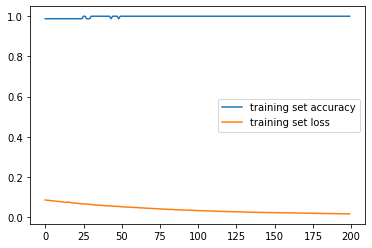

In [35]:
#plotting model accuracy
plt.plot(train.history['accuracy'],label='training set accuracy')
plt.plot(train.history['loss'],label='training set loss')
plt.legend()

In [36]:
#chatting
import random


while True:
  texts_p = []
  prediction_input = input('You : ')

  #removing punctuation and converting to lowercase
  prediction_input = [letters.lower() for letters in prediction_input if letters not in string.punctuation]
  prediction_input = ''.join(prediction_input)
  texts_p.append(prediction_input)

  #tokenizing and padding
  prediction_input = tokenizer.texts_to_sequences(texts_p)
  prediction_input = np.array(prediction_input).reshape(-1)
  prediction_input = pad_sequences([prediction_input],input_shape)

  #getting output from model
  output = model.predict(prediction_input)
  output = output.argmax()

  #finding the right tag and predicting
  response_tag = le.inverse_transform([output])[0]
  print("Going Merry : ",random.choice(responses[response_tag]))
  if response_tag == "goodbye":
    break

You : hi
1/1 [==============================] - 1s 538ms/step
Going Merry :  ahoy!!
You : are there pirates?
1/1 [==============================] - 0s 21ms/step
Going Merry :  East Blue. That's where I live
You : how do i join pirates ?
1/1 [==============================] - 0s 30ms/step
Going Merry :  well. there are some pre-requisite and after you complete them, find the straw hat centers
You : how i do that ?
1/1 [==============================] - 0s 24ms/step
Going Merry :  My name is Going Merry and I am here to answer your questions regarding our organization. go ahead and shoot
You : who is the captain
1/1 [==============================] - 0s 46ms/step
Going Merry :  I am a The Great Pirate Bot , you can call me Going Merry
You : what are the pre
1/1 [==============================] - 0s 21ms/step
Going Merry :  swordsman, a medical reindeer, taekwando Cook, master navigator, simple minded monkey, highly intelligent strategist, god usop. you gotta be one of these things to pas